## 1. Import required libraries and read the dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Apps_data+(1).csv')

## 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.sample(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8308,Piano Free - Keyboard with Magic Tiles Music G...,GAME,4.5,785622,Varies with device,"50,000,000+",Free,0,Everyone,Music,"June 29, 2018",1.35.2,4.1 and up
5710,App Seguridad AV Villas,FINANCE,2.3,251,5.7M,"50,000+",Free,0,Everyone,Finance,"October 12, 2017",1.0.5,4.0 and up
8934,Mini DV,AUTO_AND_VEHICLES,3.5,12,19M,"5,000+",Free,0,Everyone,Auto & Vehicles,"May 29, 2018",1.27,4.0 and up
5652,Au Mobile: Audition Chính Hiệu,GAME,3.9,85278,23M,"1,000,000+",Free,0,Mature 17+,Music,"July 17, 2018",1.8.0716,4.0.3 and up


In [6]:
df.shape

(10841, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [7]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [8]:
df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.describe(include='object')

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


Only one column is in float type. Machine can understand numbers only,in order to train the model the columns has to be converted from object to int or float datatypes

## 4. Check if there are any duplicate records in the dataset? if any drop them

In [16]:
duplicate=df.duplicated().sum()
duplicate

483

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

## 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [19]:
df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [11]:
invalid=df[df['Category']=='1.9'].index
df.drop(invalid,inplace=True)

In [12]:
df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

## 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [13]:
df['Rating'].isnull().sum()

1465

In [15]:
df.dropna(subset='Rating',inplace=True)

In [11]:
df['Rating'].isnull().sum()

1474

In [12]:
df['Rating_category']= df['Rating'].map(lambda x: 'high' if x>=3.5 else 'low')

In [23]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high


## 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

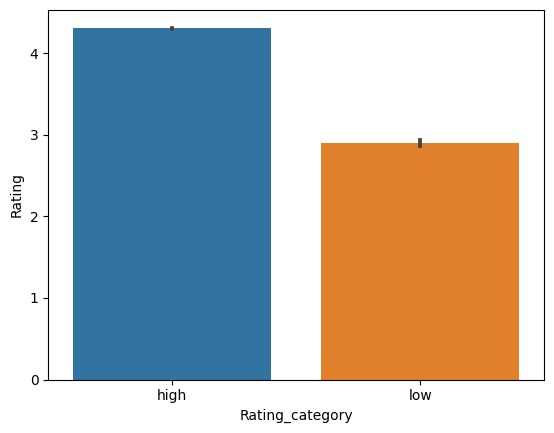

In [13]:
sns.barplot(x=df['Rating_category'],y=df['Rating']);

Most of the rating is above 3.5 out of 5

## 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [25]:
df['Reviews']=df['Reviews'].astype(int)`

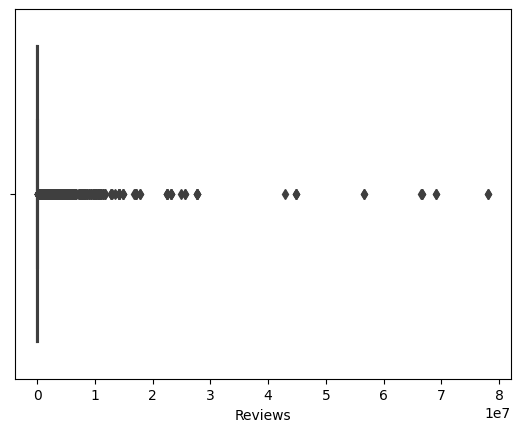

In [27]:
sns.boxplot(x= df['Reviews']);

In [14]:
from sklearn.preprocessing import FunctionTransformer

In [43]:
log_tr= FunctionTransformer(np.log1p)

In [44]:
df['Reviews']=pd.DataFrame(log_tr.fit_transform(df['Reviews']))

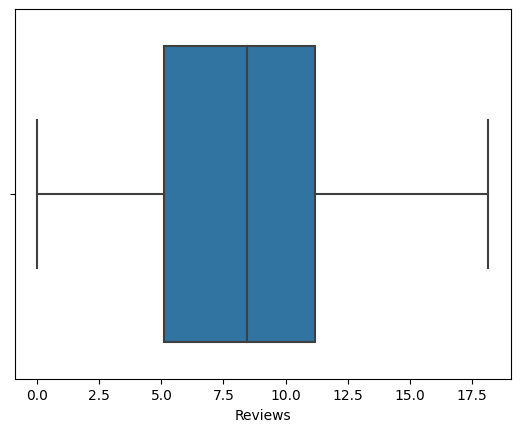

In [31]:
sns.boxplot(x= df['Reviews']);

## 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [46]:
df[['Size']]

,Size
0,51
1,27
2,367
3,98
4,63
...,...
10836,239
10837,124
10838,413
10839,461


In [47]:
df=df[df['Size'] != 'Varies with device']

In [48]:
df['Size'] = df['Size'].replace({'k':'*1e3','M':'*1e6'}, regex = True).map(pd.eval).astype(int)

In [49]:
df[['Size']]

,Size
0,51
1,27
2,367
3,98
4,63
...,...
10836,239
10837,124
10838,413
10839,461


## 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [19]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [20]:
df['Installs'] = df['Installs'].str.replace(',', '')
df['Installs'] = df['Installs'].str.replace('+', '')

In [ ]:
df['Installs']=df['Installs'].astype(int)

## 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [22]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [51]:
df['Price']=df['Price'].str.replace('$','').astype(float)

In [50]:
df['Price'].unique()

array([91, 74, 57, 81,  6, 41, 83, 79, 52, 15, 90, 82,  0, 89, 78, 16, 43,
       19, 85, 27, 23,  1, 46, 20, 34, 17,  7, 32, 25, 59, 84, 63, 56, 67,
       10, 87, 33, 54, 44, 65, 28, 75, 48, 12, 72, 70,  9, 35,  8, 80,  5,
       77, 21, 47, 61, 60, 29, 62, 31, 86, 11, 22, 73, 76, 18, 26, 50, 37,
       71, 13, 30, 55, 68, 24, 49, 66, 38, 51, 69, 45, 40, 39, 14, 42, 88,
       36, 58, 53, 64,  4, 92,  3,  2], dtype=int64)

## 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since wecreated a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [52]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.071357,0.080154,0.054361,-0.021924
Reviews,0.071357,1.000000,0.243884,0.144985,-0.016671
Size,0.080154,0.243884,1.000000,0.167011,-0.026697
Installs,0.054361,0.144985,0.167011,1.000000,-0.010622
Price,-0.021924,-0.016671,-0.026697,-0.010622,1.000000


In [53]:
column=df[['App','Genres','Last Updated','Current Ver','Android Ver','Rating']]
df= df.drop(column,axis=1)

In [54]:
df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,0.484353,19000000.0,10000,Free,0.0,Everyone,high
1,ART_AND_DESIGN,0.656367,14000000.0,500000,Free,0.0,Everyone,high
2,ART_AND_DESIGN,0.888638,8.7,5000000,Free,0.0,Everyone,high
3,ART_AND_DESIGN,0.919519,25000000.0,50000000,Free,0.0,Teen,high
4,ART_AND_DESIGN,0.656367,2.8,100000,Free,0.0,Everyone,high


## 13. Encode the categorical columns.

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         7424 non-null   object 
 1   Reviews          7277 non-null   float64
 2   Size             7424 non-null   float64
 3   Installs         7424 non-null   int32  
 4   Type             7424 non-null   object 
 5   Price            7424 non-null   float64
 6   Content Rating   7424 non-null   object 
 7   Rating_category  7424 non-null   object 
dtypes: float64(3), int32(1), object(4)
memory usage: 493.0+ KB


In [31]:
from sklearn.preprocessing import LabelEncoder
lc= LabelEncoder()
df['Category']= lc.fit_transform(df['Category'])
df['Type']= lc.fit_transform(df['Type'])

In [32]:
def cat_to_num(df):
    x = list(df.select_dtypes(include=['object']).columns)
    for col in x:
        df[col] = lc.fit_transform(list(df[col]))

In [33]:
cat_to_num(df)

## 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [34]:
df1= df.copy()

In [35]:
x=df1.drop('Rating_category',axis=1)
y=df1['Rating_category']

## 15. Split the dataset into train and test

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=555)

## 16. Standardize the data, so that the values are within a particular range`

In [53]:
#Using standardization
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scale_train=pd.DataFrame(sc.fit_transform(x_train))
scale_test= pd.DataFrame(sc.fit_transform(x_test))
scale_test

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.141446,-0.355535,0.815405,-0.427065,1.595089,-0.166676,-0.27141,0.239041,-0.460703,0.556097,-0.039776,-0.059046,-0.350911
1,-0.202591,-0.719437,-0.380297,1.259943,-0.936339,0.866382,-0.27141,0.239041,-0.460703,-0.840643,0.323563,-1.229919,-0.077111
2,-0.766277,-0.355535,0.217554,1.458415,-0.392082,-0.166676,-0.27141,0.239041,2.503613,-2.051152,-0.136471,0.264458,-0.350911
3,1.476889,0.736171,NaN,-1.472528,-1.170496,-1.406347,-0.27141,0.239041,2.503613,0.462981,-1.739262,-1.235137,-0.077111
4,-0.383853,-1.568542,1.014689,1.567306,0.044589,-0.786512,-0.27141,0.239041,-0.460703,-1.368301,-0.095449,-1.352015,-0.077111
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2706,-0.019520,-0.355535,0.616121,0.910740,0.190147,0.039935,-0.27141,0.239041,2.503613,-2.051152,-1.288019,-0.845889,-0.350911
2707,1.180574,-1.568542,0.217554,0.676329,-0.854067,-0.373288,-0.27141,0.239041,-0.460703,-1.368301,-1.797865,0.138187,-2.267514
2708,-1.459849,-1.568542,0.217554,-0.480706,-1.240110,-0.373288,-0.27141,0.239041,-0.460703,-1.368301,0.056919,1.195312,1.018091
2709,-0.190651,-0.719437,1.213972,0.389350,0.392661,-0.993123,-0.27141,0.239041,-0.460703,-0.437141,0.285471,0.971991,0.333590
